## Zukhra Mazhitova

A dataset of Students' Performance in Math Class is chosen from UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/ml/index.php). The task is to predict final grade of these students, based on their backgroud, familty information, lifestyle and first and second period grades. In order to perform that, different types of Regressors, Feature Selectors and Extractors where implemented and best performing model was chosen and implemented.

### Methods 
* Scaling
* Encoding categorical variables
* Feature selection
* Feature extraction


### Data Description 
* school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
* sex - student's sex (binary: "F" - female or "M" - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: "U" - urban or "R" - rural)
* famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
* Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
* Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
* Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
* reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
* guardian - student's guardian (nominal: "mother", "father" or "other")
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)

* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import re
import sklearn as sk
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
student = pd.read_csv("student-mat.csv",sep=';') 
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
student.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [4]:
student.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
df = student.copy()

In [6]:
print(df['schoolsup'].value_counts().sort_values(ascending=False))

no     344
yes     51
Name: schoolsup, dtype: int64


In [7]:
cols = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic' ]

In [8]:
for i in cols: 
    df[i] = [ 1  if x == 'yes'
                  else 0 
                  for x in df[i]]


In [9]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
df = pd.get_dummies(df)

df.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0


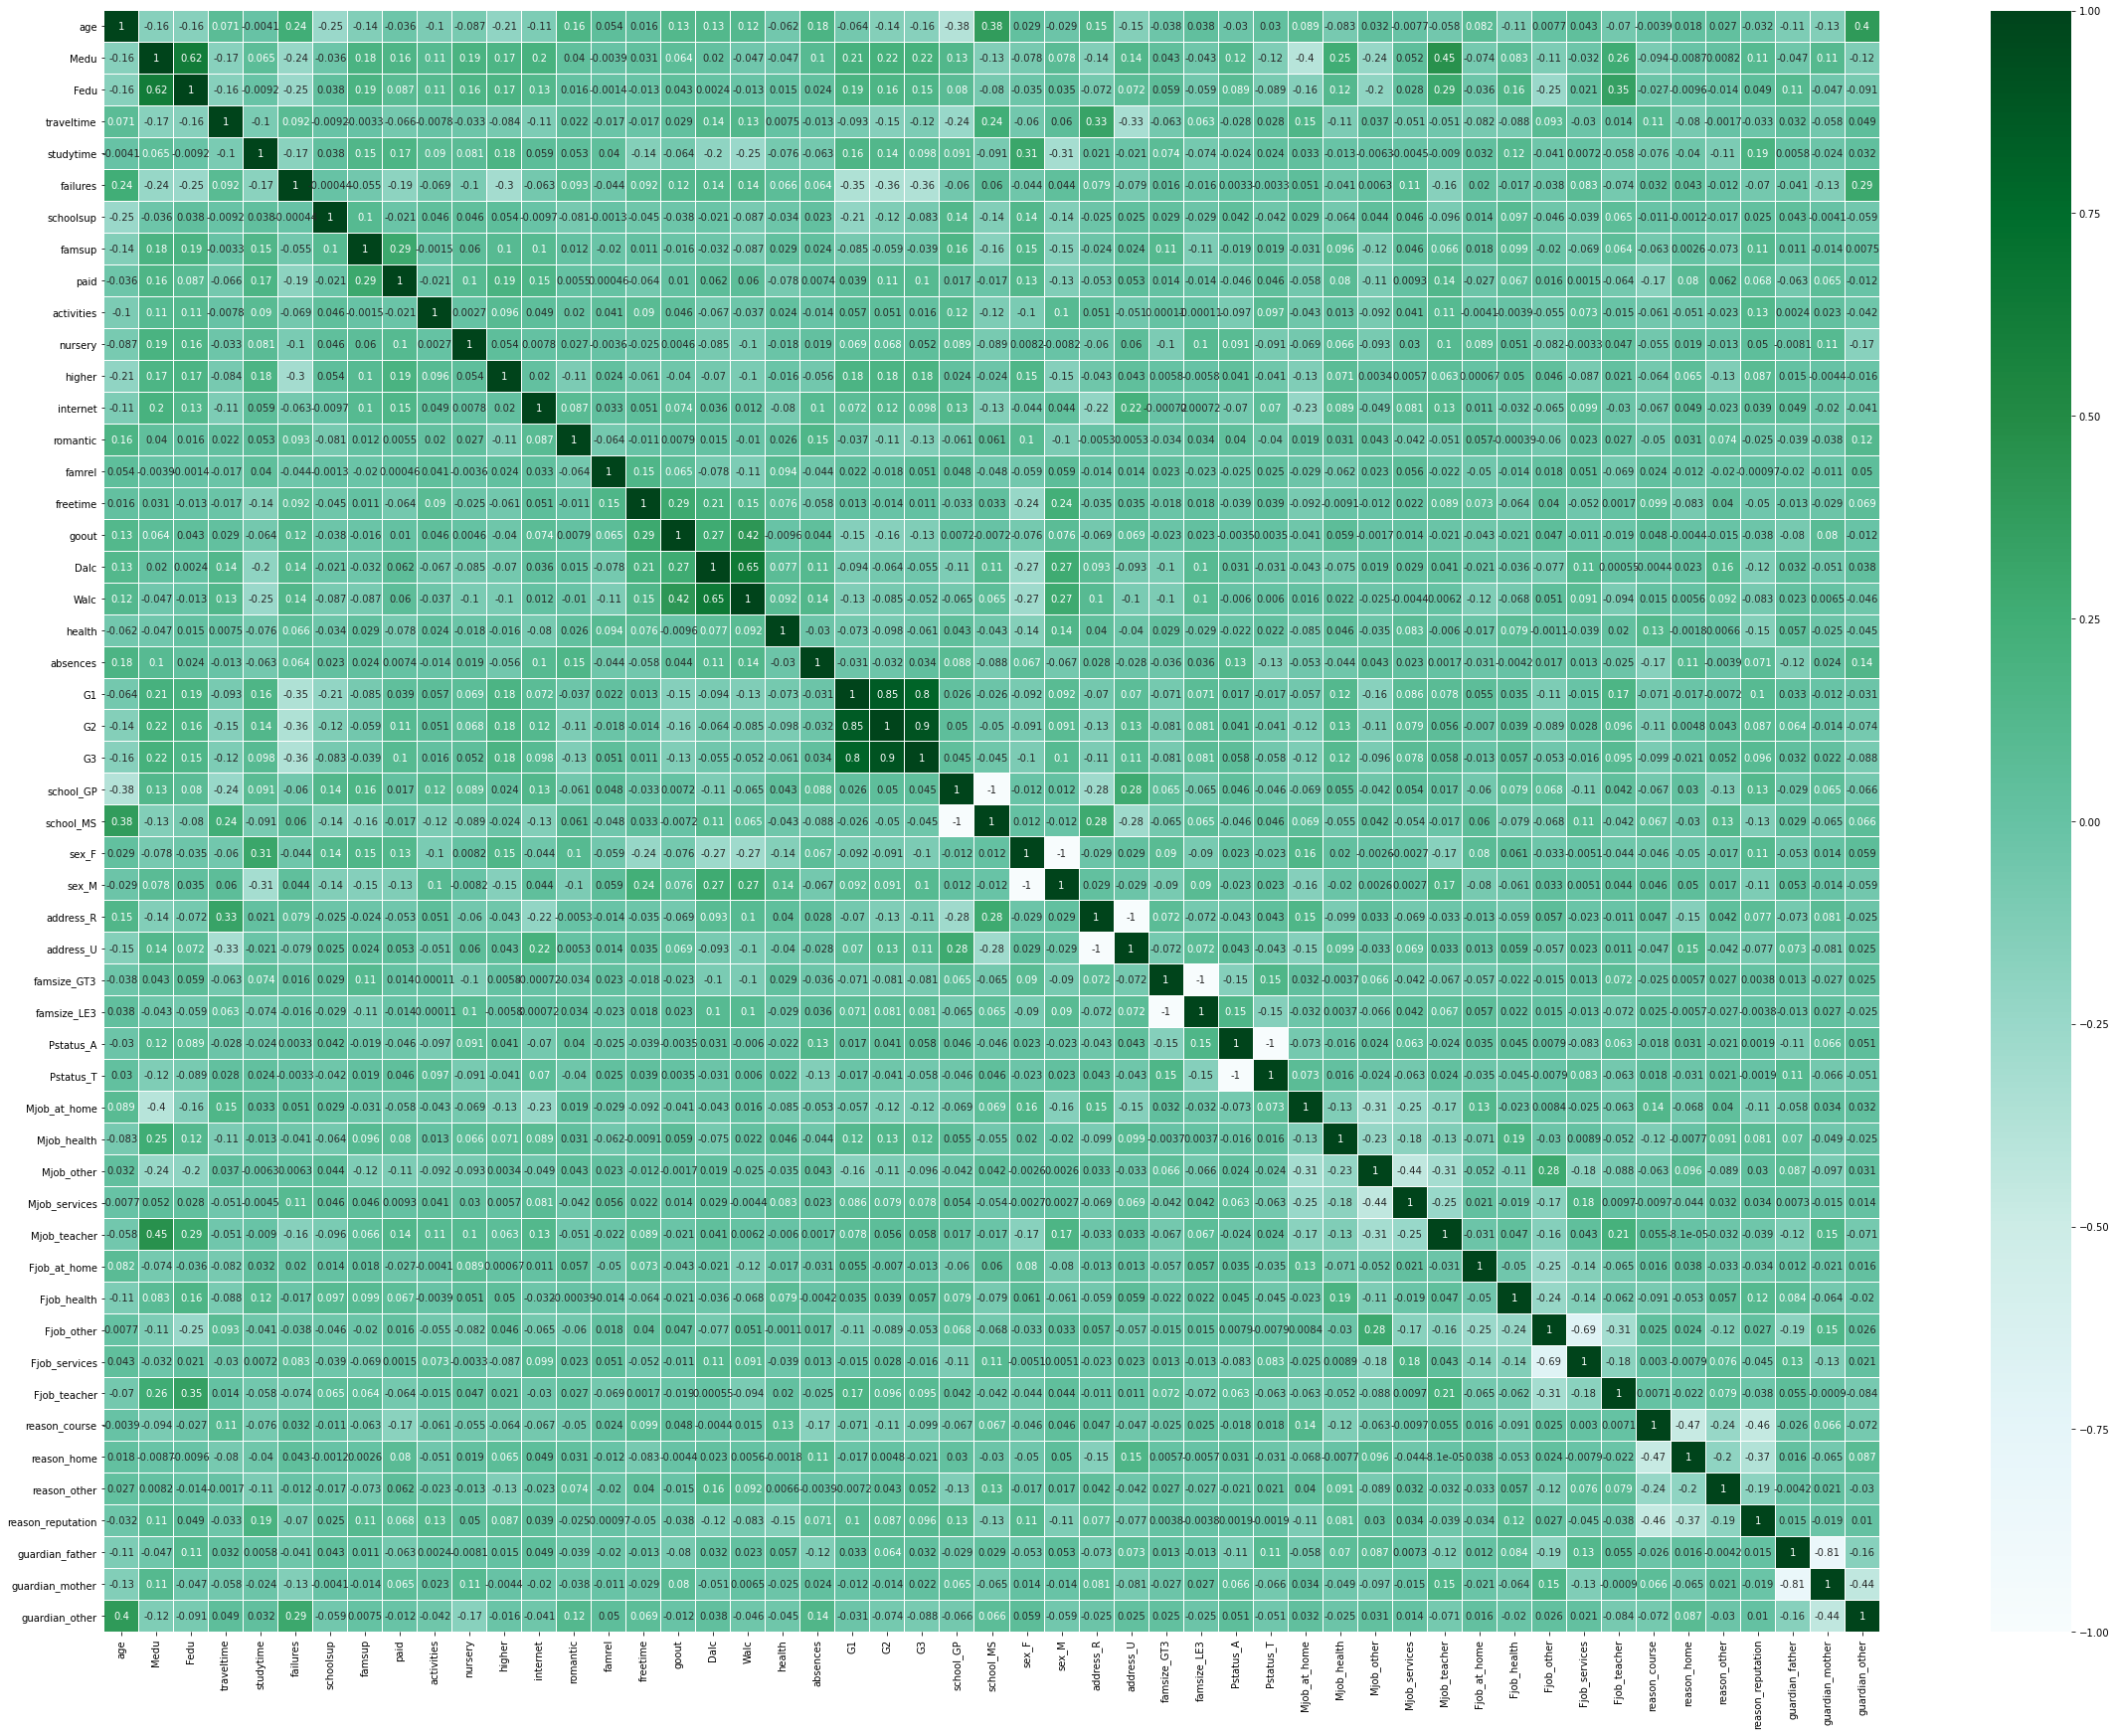

In [11]:
df_corr = df.corr()
plt.subplots(figsize = (40, 30))
sns.heatmap(df_corr, cmap = 'BuGn', linewidth = 0.005, annot = True);

### Splitting data into Train and Test

In [12]:
X = df.drop('G3',axis=1)
y = df.G3

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80, random_state=40)

### Training using Linear Regression

In [14]:
lr = LinearRegression()

lr.fit(X_train, y_train)



LinearRegression()

In [15]:
y_hat = lr.predict(X_test)


In [16]:
mse = mean_squared_error(y_test, y_hat)
print("Mean Squared Error is: ", mse)
r2 = lr.score(X_test,y_test)
print('The R-square is: ', r2)

Mean Squared Error is:  3.6441482562053054
The R-square is:  0.8115855679244349


In [17]:
cross_val = cross_val_score(lr, X_train, y_train, cv = 5)

print("The k-cross validation accuracy is: ", cross_val.mean())

The k-cross validation accuracy is:  0.7920876352384857


### Random Forest Regressor

In [18]:
rf = RandomForestRegressor(n_estimators = 60, max_depth = 25, 
                           min_samples_split = 20, n_jobs = 2)

In [19]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8879444649828715

In [20]:
y_hat_testrf = rf.predict(X_test)

In [21]:
mse_rf =  mean_squared_error(y_test, y_hat_testrf)
print("Test Data MSE: ", mse_rf)
r2_rf = rf.score(X_test, y_test)
print('Test Data R-square: ', r2_rf)

Test Data MSE:  2.167280807698695
Test Data R-square:  0.8879444649828715


### KNN Regressor

In [22]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.744384369876103
RMSE value for k=  2 is: 2.2445433129134096
RMSE value for k=  3 is: 1.913384641838401
RMSE value for k=  4 is: 1.8502052571730754
RMSE value for k=  5 is: 1.901897786389536
RMSE value for k=  6 is: 1.888599299386388
RMSE value for k=  7 is: 1.8709322533888981
RMSE value for k=  8 is: 1.892847546804295
RMSE value for k=  9 is: 1.8460433989105023
RMSE value for k=  10 is: 1.7767841808493388
RMSE value for k=  11 is: 1.7459770986107788
RMSE value for k=  12 is: 1.725185735735376
RMSE value for k=  13 is: 1.750247422508316
RMSE value for k=  14 is: 1.721597577111113
RMSE value for k=  15 is: 1.6945681400978243
RMSE value for k=  16 is: 1.7227047424752844
RMSE value for k=  17 is: 1.6662271477467885
RMSE value for k=  18 is: 1.6697112369927423
RMSE value for k=  19 is: 1.701382313814915
RMSE value for k=  20 is: 1.696869791294428


In [23]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=17)

reg.fit(X_train, y_train)
y_hat_knn = reg.predict(X_test)



In [24]:
mse_knn= mean_squared_error(y_test, y_hat_knn)
print("Test Data MSE: ", mse_knn) 
r2_knn=reg.score(X_test, y_test)
print("R-square:  ",r2_knn)


Test Data MSE:  2.776312907888398
R-square:   0.8564555053672376


### Comparing models

In [25]:
print("Mean Squared Error using Linear Regression is: ", mse)
print("Mean Squared Error using KNN Regressor is: ", mse_knn) 
print("Mean Squared Error using Random Forest Regressor is:: ", mse_rf)


Mean Squared Error using Linear Regression is:  3.6441482562053054
Mean Squared Error using KNN Regressor is:  2.776312907888398
Mean Squared Error using Random Forest Regressor is::  2.167280807698695


It is decided to use Random Forest Regressor, because mean squared error is lowest.

### Without preprocessing

In [26]:
X_without = student.copy()
for col_name in X_without.columns:
    if X_without[col_name].dtypes not in ['int32','int64','float32','float64']:
        X_without = X_without.drop(col_name, 1)
X_without.drop('G3',axis=1,inplace=True)
X_without.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10


In [27]:
from sklearn.model_selection import train_test_split

X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(X_without, y,train_size=0.80)



In [28]:
rf.fit(X_train_without, y_train_without)
rf.score(X_test_without, y_test_without)

0.8546269731067453

## Feature Selection

### K best

In [29]:
from sklearn.feature_selection import SelectKBest, chi2

select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False).head(10)

,Feature,Scores
20,absences,578.074385
22,G2,365.471872
21,G1,245.503353
5,failures,105.727756
6,schoolsup,27.115815
42,Fjob_teacher,23.728516
18,Walc,22.512371
34,Mjob_health,20.765568
36,Mjob_services,19.360387
17,Dalc,19.107108


In [30]:
X_train_chi = select_feature.transform(X_train)
X_test_chi = select_feature.transform(X_test)

In [31]:
rf.fit(X_train_chi,y_train)
rf.score(X_test_chi,y_test)

0.8892742342976748

### Linear SVC

In [32]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_test_lsvc = model.transform(X_test)
X_train_lsvc=model.transform(X_train)

rf = RandomForestRegressor(n_estimators = 60, max_depth = 25, 
                           min_samples_split = 20, n_jobs = 2)
rf.fit(X_train_lsvc, y_train)
r2_svc = rf.score(X_test_lsvc,y_test)
print('R2 score',r2_svc)

R2 score 0.887881482263167


### Recursive feature elimination

In [33]:
rfe = RFE(estimator=rf, step=1)
rfe = rfe.fit(X_train, y_train)

selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,age,1
37,Mjob_teacher,1
23,school_GP,1
22,G2,1
21,G1,1
20,absences,1
19,health,1
18,Walc,1
17,Dalc,1
16,goout,1


In [34]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

rf.fit(X_train_rfe, y_train)
rf.score(X_test_rfe,y_test)


0.885109248535534

### Recursive feature elimination with cross validation


In [35]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=rf, step=1, cv=5)
rfecv = rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 3
Best features : Index(['age', 'absences', 'G2'], dtype='object')


In [36]:
rfecv.grid_scores_


array([0.80116183, 0.86676423, 0.87438135, 0.87065596, 0.86677068,
       0.86641799, 0.86827316, 0.86676225, 0.85691597, 0.86428767,
       0.86259522, 0.861291  , 0.863257  , 0.86256614, 0.86148987,
       0.8664082 , 0.86039686, 0.85496313, 0.86548669, 0.86448325,
       0.86221562, 0.86335726, 0.86254756, 0.86495204, 0.86197309,
       0.85898479, 0.86259504, 0.86209008, 0.86457272, 0.86277791,
       0.86071475, 0.86071191, 0.85639812, 0.85966476, 0.86502128,
       0.86131687, 0.86356471, 0.86339487, 0.85858585, 0.86188214,
       0.85997263, 0.86106673, 0.86617497, 0.85921652, 0.85942245,
       0.85301234, 0.86430859, 0.858314  , 0.86588404, 0.86033113])

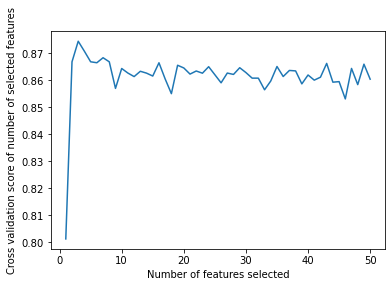

In [37]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [39]:

X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

rf.fit(X_train_rfecv, y_train)

rf.score(X_test_rfecv,y_test)


0.889548225808565

### Extra Trees

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)

mask = clf.feature_importances_ > 0.1
X_reduced = X.loc[:, mask]


In [41]:
model = SelectFromModel(clf, prefit=True)
X_train_clf = model.transform(X_train)
X_test_clf = model.transform(X_test)

rf = RandomForestRegressor(n_estimators = 60, max_depth = 25, 
                           min_samples_split = 20, n_jobs = 2)
rf.fit(X_train_clf, y_train)
rf.score(X_test_clf,y_test)


0.887427239534714

Feature selection with Extra Trees Classifier had a best score(0.893), so this method will be used for feature selection.

### Feature extraction

In [42]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD( n_components=5, n_iter=7,random_state=42).fit(X,y)

X_train_cvd = model.transform(X_train)
X_test_cvd = model.transform(X_test)

rf = RandomForestRegressor(n_estimators = 60, max_depth = 25, 
                           min_samples_split = 20, n_jobs = 2)
rf.fit(X_train_cvd, y_train)
rf.score(X_test_cvd,y_test)

0.8911402766257589

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, svd_solver='full').fit(X,y)

X_train_pca = model.transform(X_train)
X_test_pca = model.transform(X_test)

rf = RandomForestRegressor(n_estimators = 60, max_depth = 25, 
                           min_samples_split = 20, n_jobs = 2)
rf.fit(X_train_pca, y_train)
rf.score(X_test_pca,y_test)

0.8881314837621402

Considered to use PCA

### Building a pipe

In [50]:
pipe3 = Pipeline([
('reducer', PCA(n_components=12, svd_solver='full')),
#('reducer',TruncatedSVD( n_components=5, n_iter=7, random_state=42)),
('scale',StandardScaler()), 
('feature_selection',SelectFromModel(ExtraTreesClassifier(n_estimators=50))),
#('feature_selection', rf),
('transformation', PolynomialFeatures(include_bias = False)),
#('random_forest', RandomForestRegressor(n_estimators = 60, max_depth = 25, 
                           #min_samples_split = 20, n_jobs = 2))])
('model', RandomForestRegressor(n_estimators = 60, max_depth = 25, 
                           min_samples_split = 20, n_jobs = 2))])
#('model', LinearRegression())])

pipe3.fit(X_train, y_train)
print(pipe3.score(X_test, y_test))

0.9029246487010525


### Conclusion
Without preprocessing score was 0.866, then with encoding, scaling and selecting and extracting features model's r2 score improved to 0.90. Therefore the score for the work can surely be 99.